Env

In [ ]:
import torch
from torch.utils import data
from torchvision import transforms
import albumentations as A
import numpy as np
import utils
import warnings
warnings.filterwarnings('ignore')

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

BATCH_SIZE = 6
NUM_WORKERS = 0 
WIDTH = 336
HEIGHT = 224

Data

In [3]:
pth_test_img = 'Data/ISIC2017/ISIC-2017_Test_Data'
pth_test_mask = 'Data/ISIC2017/ISIC-2017_Test_v2_Part1_GroundTruth'
ann_test = 'Data/ISIC2017/ISIC-2017_Test_v2_Part3_GroundTruth.csv'


trans_test = A.Compose([A.Resize(height=int(HEIGHT*1.1), width=int(WIDTH*1.1)),
                        A.CenterCrop(height=HEIGHT, width=WIDTH)
                        ])

trans_img = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406],
                                                     [0.229, 0.224, 0.225])
                                ])

def trans_mask(mask):
    return torch.as_tensor(np.array(mask/255), dtype=torch.int64)

In [24]:
test_data = utils.SegData(ann_test, pth_test_img, pth_test_mask, trans_test, trans_img, trans_mask)
test_loader = data.DataLoader(test_data, BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

Model

In [5]:
model = torch.load('model/dense_unet_1.pkl').to(device)

Eval

In [6]:
from utils.evaluation import seg_predict, pixel_accuracy, pixel_sensitivity, pixel_specificity, mIoU, mDSC, mTJI
from utils.visualize import show_seg_samples

In [32]:
x, y = next(iter(test_loader))
pred = model(x.to(device))
pred = torch.argmax(pred, dim=1).to('cpu')

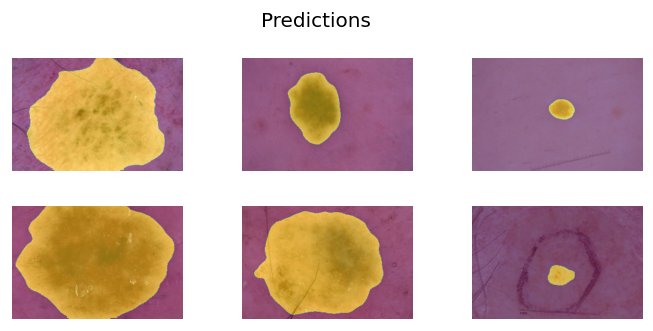

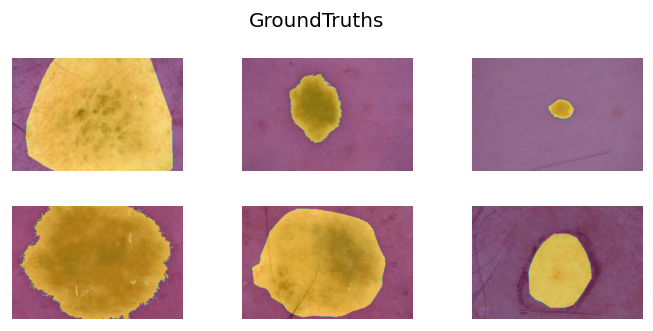

In [33]:
show_seg_samples(x, pred, title="Predictions", dpi=120)
show_seg_samples(x, y, title="GroundTruths", dpi=120)